# Importing Libraries.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Setting Path.

In [2]:
path = r'C:\Users\Chaot\02-2024 Instacart Basket Analysis'
path

'C:\\Users\\Chaot\\02-2024 Instacart Basket Analysis'

# Importing Dataframe.

In [3]:
cop_merged = pd.read_pickle(os.path.join(path, '02 - Data', 'Prepared Data', '4.9_cop_merged.pkl'))
pd.set_option("display.max_columns", None)
cop_merged.head(3)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spender_flag,customer_frequency,frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Medium Range Product,Regularly busy days,Average Orders,10,New Customer,6.367797,Low,20.5,Non-Frequent,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Medium Range Product,Least busiest days,Average Orders,10,New Customer,6.367797,Low,20.5,Non-Frequent,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Medium Range Product,Least busiest days,Most Orders,10,New Customer,6.367797,Low,20.5,Non-Frequent,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [4]:
# mapping departments
department_mapping = {1: "frozen", 2: "other", 3: "bakery", 4: "produce", 5: "alcohol", 
                      6: "international", 7: "beverages", 8: "pets", 9: "dry goods pasta", 10: "bulk",
                      11: "personal care", 12: "meat seafood", 13: "pantry", 14: "breakfast", 15: "canned goods",
                      16: "dairy eggs", 17: "household", 18: "babies", 19: "snacks", 20: "deli",}

cop_merged['department_name'] = cop_merged['department_id'].map(department_mapping).fillna('n/a')

In [5]:
#mapping the day of week.
dow_mapping = {0: "Saturday", 1: "Sunday", 2: "Monday", 3: "Tuesday", 4: "Wednesday", 5: "Thursday", 6: "Friday",}

cop_merged['day_of_week'] = cop_merged['orders_day_of_week'].map(dow_mapping).fillna('n/a')

In [6]:
cop_merged.loc[cop_merged['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [7]:
cop_merged.loc[(cop_merged['prices'] <= 15) & (cop_merged['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [8]:
cop_merged.loc[cop_merged['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [9]:
cop_merged.loc[cop_merged['prices'] > 100, 'prices'] = np.nan

In [10]:
cop_merged['price_range_loc'].value_counts()

price_range_loc
Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: count, dtype: int64

# 4.10.2 - Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

There are two columns, one for first name and one for last name. From a previous check, first name is missing for some values. Since each user will have a unique user id, we can remove the first name column and last name column as it will not be needed. We will do that now below.

In [11]:
# Checking for missing values for first_name column.

cop_merged['first_name'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 32404859 entries, 0 to 32404858
Series name: first_name
Non-Null Count     Dtype 
--------------     ----- 
30629741 non-null  object
dtypes: object(1)
memory usage: 247.2+ MB


We can see that from the above, out of 32,404,859 rows, 30,629,741 of the rows returned non-null.

In [12]:
# We will put this into a new data frame with the dropped first name column.

nf_cop_merged = cop_merged.drop(columns = ['first_name','last_name'])
nf_cop_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   orders_day_of_week      int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  price_range_loc         object 
 14  busiest_days            object 
 15  busiest_period_of_day   object 
 16  max_order               int64  
 17  loyalty_flag            object 
 18  mean_product_price      float64
 19  spender_flag            object 
 20  customer_frequency      float64
 21  frequency_flag          objec

# 4.10.3 - The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [13]:
# Creating a column for Region as Not Available.

nf_cop_merged['region'] = 'Not Available'

# Setting specific states into the correct region.

nf_cop_merged.loc[nf_cop_merged['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 
                                               'Indiana', 'Ohio', 'North Dakota', 
                                               'South Dakota', 'Nebraska', 'Kansas', 
                                               'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'

nf_cop_merged.loc[nf_cop_merged['state'].isin(['Maine', 'New Hampshire', 'Vermont', 
                                               'Massachusetts', 'Rhode Island', 'Connecticut', 
                                               'New York', 'Pennsylvania', 'New Jersey']), 'region'] = 'Northeast'

nf_cop_merged.loc[nf_cop_merged['state'].isin(['Idaho', 'Montana', 'Wyoming',
                                               'Nevada', 'Utah', 'Colorado',
                                               'Arizona', 'New Mexico', 'Alaska',
                                               'Washington', 'Oregon', 'California', 'Hawaii']), 'region'] = 'West'

nf_cop_merged.loc[nf_cop_merged['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 
                                               'Virginia', 'West Virginia', 'North Carolina', 
                                               'South Carolina', 'Georgia', 'Florida', 
                                               'Kentucky', 'Tennessee', 'Mississippi', 
                                               'Alabama', 'Oklahoma', 'Texas', 
                                               'Arkansas', 'Louisiana']), 'region'] = 'South'

# checking that column for unique/blank.

nf_cop_merged['region'].describe()

count     32404859
unique           4
top          South
freq      10791885
Name: region, dtype: object

As we can see from the above, we have the correct amount of count with only 4 unique regions that should be the above. 

### 4.10.3 - Cont: Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [14]:
nf_cop_merged['spender_flag'].value_counts(dropna = False)

spender_flag
Low     31770614
High      634245
Name: count, dtype: int64

In [15]:
region_spender = nf_cop_merged[['region','spender_flag','order_id','price_range_loc','loyalty_flag']].drop_duplicates()
region_spender

,region,spender_flag,order_id,price_range_loc,loyalty_flag
0,South,Low,2539329,Mid-range product,New Customer
1,South,Low,2398795,Mid-range product,New Customer
2,South,Low,473747,Mid-range product,New Customer
3,South,Low,2254736,Mid-range product,New Customer
4,South,Low,431534,Mid-range product,New Customer
...,...,...,...,...,...
32404854,West,High,156685,Mid-range product,Regular Customer
32404855,South,Low,484769,Mid-range product,New Customer
32404856,South,Low,1561557,Mid-range product,New Customer
32404857,South,Low,276317,Mid-range product,New Customer


In [16]:
region_spender['region'].value_counts()

region
South        2100668
West         1611131
Midwest      1478641
Northeast    1112026
Name: count, dtype: int64

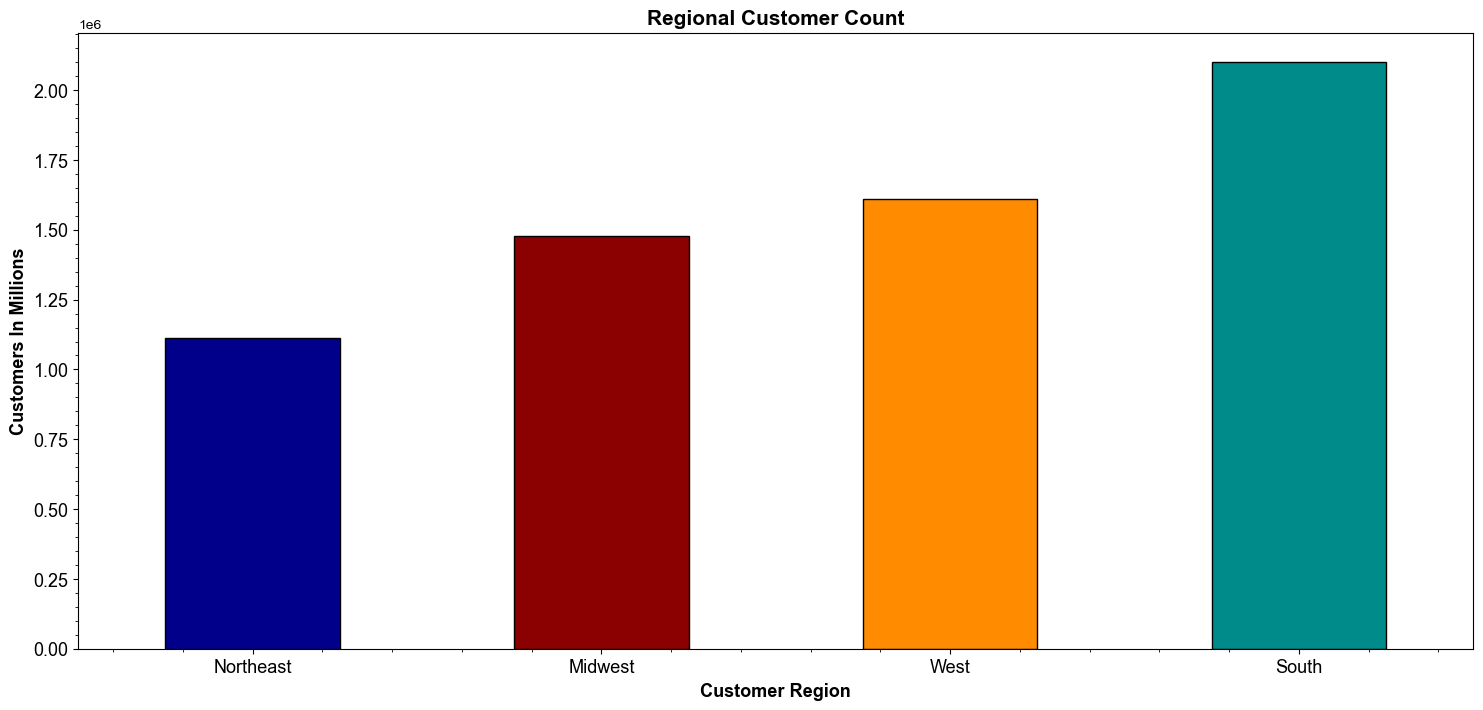

In [17]:
region_pop_bar = region_spender['region'].value_counts().sort_values(ascending=True).plot.bar(figsize=(18,8), edgecolor = 'black', color =['darkblue','darkred','darkorange','darkcyan'])
sns.set_style('ticks')
plt.xlabel('Customer Region', fontsize = 13, fontweight = 'bold')
plt.ylabel('Customers In Millions', fontsize = 13, fontweight = 'bold')
plt.title('Regional Customer Count', fontsize = 15, fontweight = 'bold')
plt.xticks(fontsize=13, rotation = 0)
plt.yticks(fontsize=13)
region_pop_bar.minorticks_on()
plt.show()
region_pop_bar.figure.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', 'Region Population Bar.png'))

In [18]:
regional_spenders = pd.crosstab(region_spender['region'], region_spender['spender_flag'], dropna = False).sort_values(by = 'High', ascending = False)
regional_spenders

spender_flag,High,Low
region,,
South,47082,2053586
West,35140,1575991
Midwest,32711,1445930
Northeast,23274,1088752


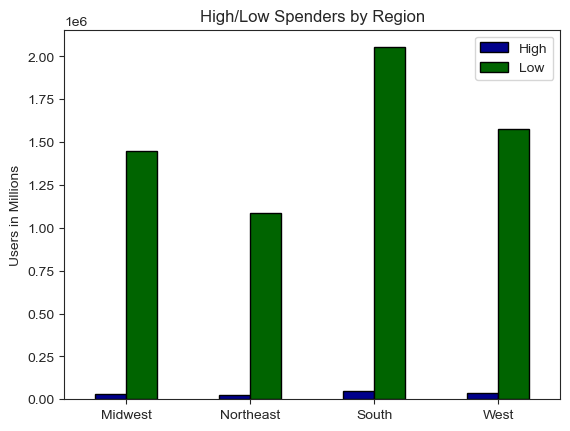

In [19]:
rs_bar = region_spender.groupby(['region','spender_flag']).size().unstack()

rs_bar.plot(kind='bar', color=['darkblue','darkgreen'], edgecolor = 'black')

plt.legend(title=None)
plt.xlabel('')
plt.ylabel('Users in Millions')
plt.title('High/Low Spenders by Region')
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', 'Region Spender bar.png'))
plt.show()


In [20]:
regional_prices = pd.crosstab(region_spender['region'], region_spender['price_range_loc'], dropna = False).sort_values(by = 'High-range product', ascending = False)
regional_prices

price_range_loc,High-range product,Low-range product,Mid-range product
region,,,
South,122578,937253,1040837
West,93969,719012,798150
Midwest,86052,659488,733101
Northeast,64515,496351,551160


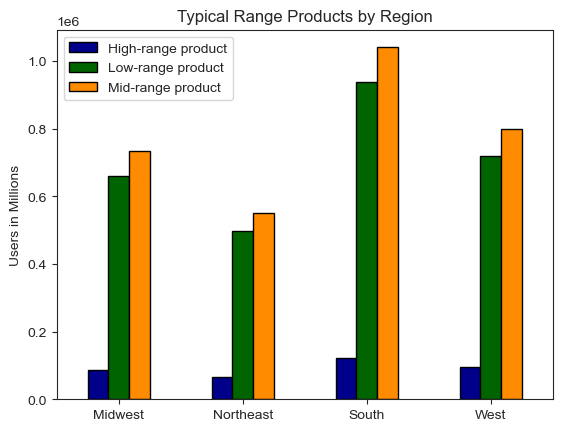

In [21]:
rp_bar = region_spender.groupby(['region','price_range_loc']).size().unstack()

rp_bar.plot(kind='bar', color=['darkblue','darkgreen','darkorange'], edgecolor = 'black')

plt.legend(title=None)
plt.xlabel('')
plt.ylabel('Users in Millions')
plt.title('Typical Range Products by Region')
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', 'Region Product Range bar.png'))
plt.show()

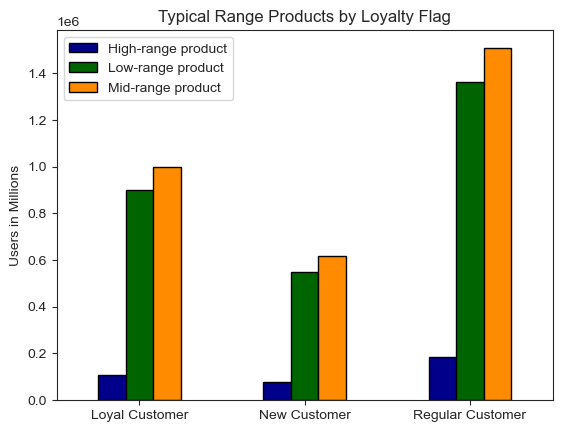

In [22]:
lf_pr_bar = region_spender.groupby(['loyalty_flag','price_range_loc']).size().unstack()

lf_pr_bar.plot(kind='bar', color=['darkblue','darkgreen','darkorange'], edgecolor = 'black')

plt.legend(title=None)
plt.xlabel('')
plt.ylabel('Users in Millions')
plt.title('Typical Range Products by Loyalty Flag')
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', 'Product Range by Loyalty Flag.png'))
plt.show()

# 4.10.4 - The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [23]:
# Creating a low exclusion flag of true/false based on max order being lower than 5.
nf_cop_merged['low_exclusion_flag'] = nf_cop_merged['max_order'] < 5

# checking counts of false and true for low exclusion flag.
nf_cop_merged['low_exclusion_flag'].value_counts(dropna = False)

low_exclusion_flag
False    30964564
True      1440295
Name: count, dtype: int64

In [24]:
no_low_orders = nf_cop_merged[~nf_cop_merged['low_exclusion_flag']]
no_low_orders.shape

(30964564, 33)

In [25]:
no_low_orders.to_pickle(os.path.join(path, '02 - Data', 'Prepared Data', 'cop_merged_no_under_5_orders.pkl'))

# 4.10.5 - The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)


In [26]:
cust_pro = nf_cop_merged[['user_id','gender','state','age','n_dependants','fam_status','income','region']].drop_duplicates()
cust_pro

,user_id,gender,state,age,n_dependants,fam_status,income,region
0,1,Female,Alabama,31,3,married,40423,South
59,15,Female,Indiana,69,0,divorced/widowed,54313,Midwest
131,19,Female,Louisiana,62,1,married,151988,South
335,21,Male,Montana,71,0,divorced/widowed,124643,West
540,31,Female,Oklahoma,38,1,married,52311,South
...,...,...,...,...,...,...,...,...
32404816,38979,Female,Indiana,57,1,married,135623,Midwest
32404819,120516,Male,Arizona,19,0,single,76190,West
32404826,166751,Female,Oregon,38,1,married,41766,West
32404829,106143,Male,Hawaii,25,0,single,53755,West


In [27]:
nf_cop_merged.groupby('income').agg({'income':['count']})

,income
,count
income,
25903,20
25911,28
25937,39
25941,31
25955,392
...,...
584097,826
590790,54


We will be taking the ages of our customer database and breaking it into three groups, Young Adult being 18 to 30, Adults being 31 to 60 and Seniors being 60 and above in age. For income we will follow the income brackets designated in the U.S. but combine Lower and Lower Middle as well as Middle and Upper Middle. Lower Class will be 0 to 58k. Middle Class will be 58k to 153k, and finally Upper Class will be anything greater than 153k.

Creating Flags for Lower class income.

In [28]:
cust_pro.loc[(cust_pro['age'] >= 18) & (cust_pro['age'] <= 30) &
             (cust_pro['income'] <= 58000), 'cust_profile'] = 'Lower Income Young Adult'

In [29]:
cust_pro.loc[(cust_pro['age'] >= 31) & (cust_pro['age'] <= 60) &
             (cust_pro['income'] <= 58000), 'cust_profile'] = 'Lower Income Adult'

In [30]:
cust_pro.loc[(cust_pro['age'] >= 61) &
             (cust_pro['income'] <= 58000), 'cust_profile'] = 'Lower Income Senior'

Creating Flags for Middle Class income.

In [31]:
cust_pro.loc[(cust_pro['age'] >= 18) & (cust_pro['age'] <= 30) &
             (cust_pro['income'] >= 58000) & (cust_pro['income'] <= 153000), 'cust_profile'] = 'Middle Income Young Adult'

In [32]:
cust_pro.loc[(cust_pro['age'] >= 31) & (cust_pro['age'] <= 60) &
             (cust_pro['income'] >= 58000) & (cust_pro['income'] <= 153000), 'cust_profile'] = 'Middle Income Adult'

In [33]:
cust_pro.loc[(cust_pro['age'] >= 61) &
             (cust_pro['income'] >= 58000) & (cust_pro['income'] <= 153000), 'cust_profile'] = 'Middle Income Senior'

Creating Flags for Upper Class income.

In [34]:
cust_pro.loc[(cust_pro['age'] >= 18) & (cust_pro['age'] <= 30) &
             (cust_pro['income'] > 153000), 'cust_profile'] = 'Upper Income Young Adult'

In [35]:
cust_pro.loc[(cust_pro['age'] >= 31) & (cust_pro['age'] <= 60) &
             (cust_pro['income'] > 153000), 'cust_profile'] = 'Upper Income Adult'

In [36]:
cust_pro.loc[(cust_pro['age'] >= 61) &
             (cust_pro['income'] > 153000), 'cust_profile'] = 'Upper Income Senior'

In [37]:
cust_pro['cust_profile'].value_counts(dropna = False)

cust_profile
Middle Income Adult          64754
Middle Income Senior         46199
Middle Income Young Adult    27440
Lower Income Adult           22111
Lower Income Young Adult     14301
Lower Income Senior          11491
Upper Income Senior           9888
Upper Income Adult            9801
Upper Income Young Adult       224
Name: count, dtype: int64

In [38]:
cust_pro_dependants = pd.crosstab(cust_pro['cust_profile'], cust_pro['n_dependants'], dropna = False)
cust_pro_dependants

n_dependants,0,1,2,3
cust_profile,,,,
Lower Income Adult,5581,5534,5458,5538
Lower Income Senior,2877,2888,2858,2868
Lower Income Young Adult,3591,3607,3620,3483
Middle Income Adult,16143,16255,16057,16299
Middle Income Senior,11523,11542,11644,11490
Middle Income Young Adult,6905,6754,6910,6871
Upper Income Adult,2456,2508,2400,2437
Upper Income Senior,2475,2397,2469,2547
Upper Income Young Adult,51,46,66,61


In [39]:
cust_pro.loc[cust_pro['n_dependants'] > 0, 'dependant_flag'] = 'with dependants'

In [40]:
cust_pro.loc[cust_pro['n_dependants'] <= 0, 'dependant_flag'] = 'without dependants'

# 4.10.6 - Create an appropriate visualization to show the distribution of profiles.


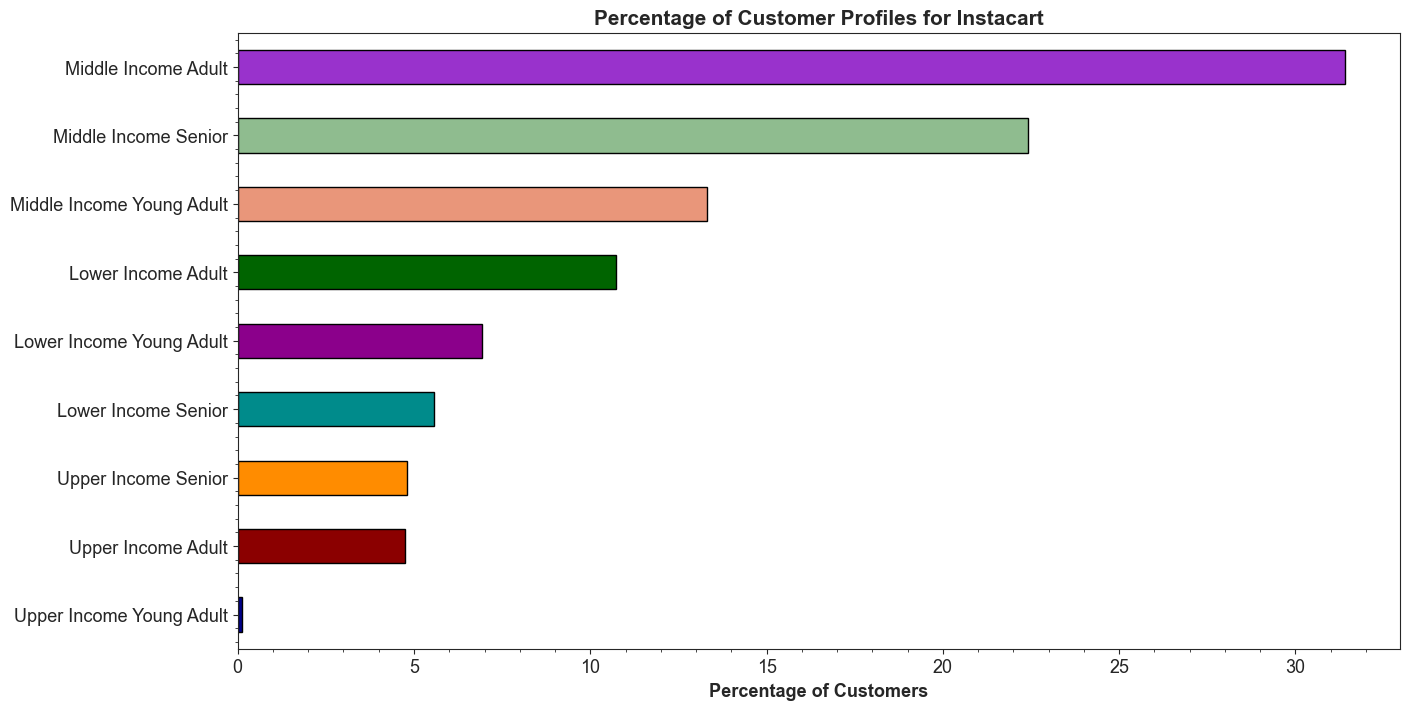

In [41]:
cust_pro_bar = (cust_pro['cust_profile'].value_counts(normalize=True)*100).sort_values(ascending=True).plot.barh(figsize=(15,8), edgecolor = 'black', color = ['darkblue','darkred','darkorange','darkcyan','darkmagenta','darkgreen','darksalmon', 'darkseagreen', 'darkorchid'])
sns.set_style('ticks')
plt.xlabel('Percentage of Customers', fontsize = 13, fontweight = 'bold')
plt.ylabel('')
plt.title('Percentage of Customer Profiles for Instacart', fontsize = 15, fontweight = 'bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
cust_pro_bar.minorticks_on()
plt.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', 'Age and Income Profiles.png'))
plt.show()

In [42]:
cust_pro_dependants = cust_pro['cust_profile'] + ' ' + cust_pro['dependant_flag']

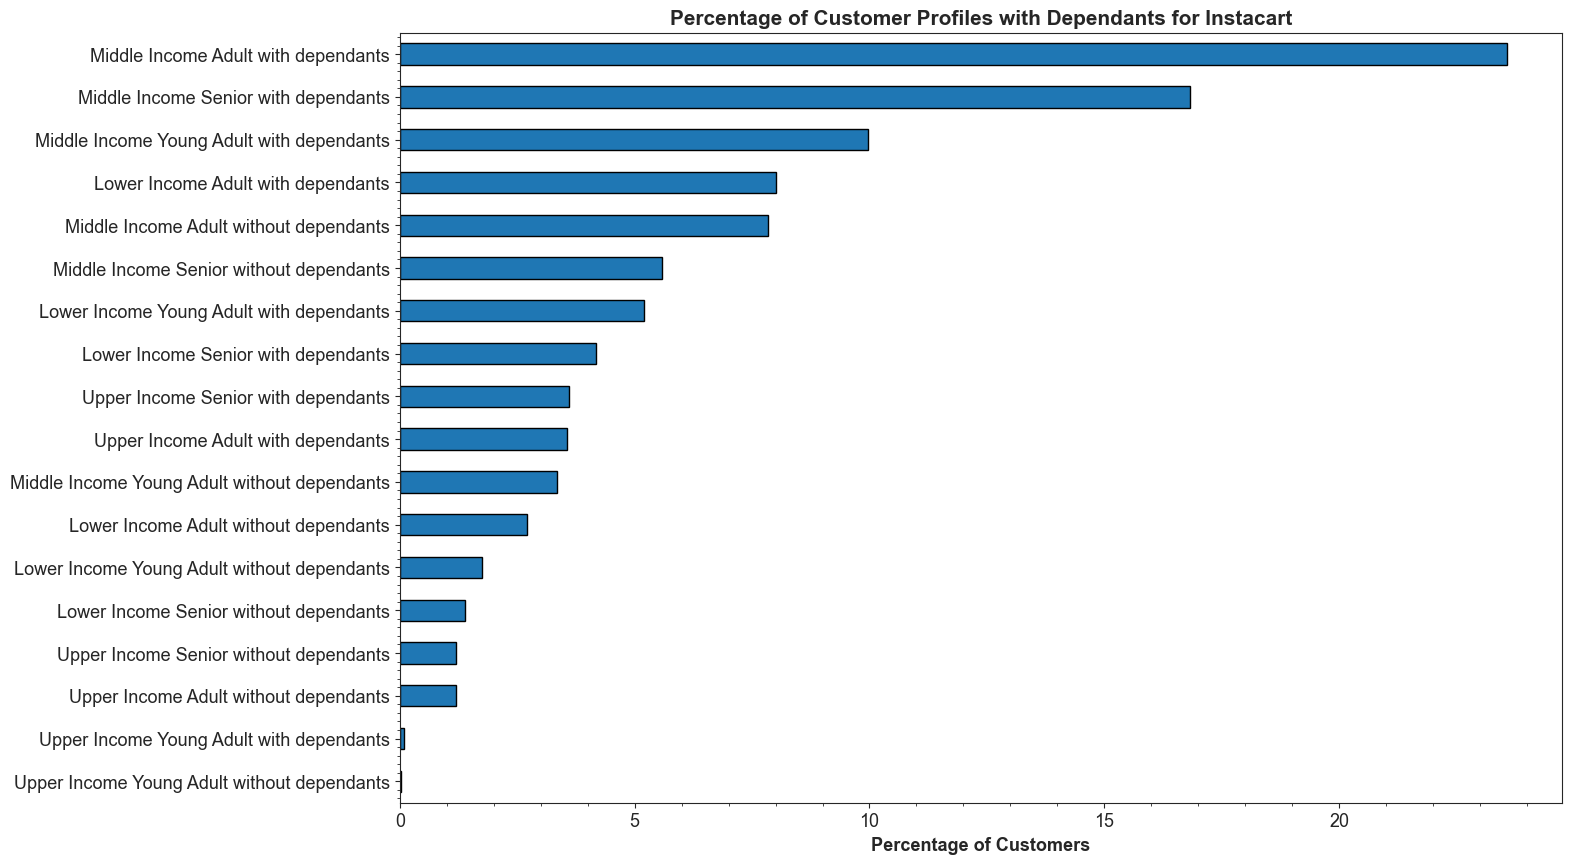

In [43]:
cust_pro_dependant_bar = (cust_pro_dependants.value_counts(normalize=True)*100).sort_values(ascending=True).plot.barh(figsize=(15,10), edgecolor = 'black')
sns.set_style('ticks')
plt.xlabel('Percentage of Customers', fontsize = 13, fontweight = 'bold')
plt.ylabel('')
plt.title('Percentage of Customer Profiles with Dependants for Instacart', fontsize = 15, fontweight = 'bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
cust_pro_dependant_bar.minorticks_on()
plt.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', 'Age and Income with or without Dependants.png'))
plt.show()

In [44]:
nf_cp_cop_merged = nf_cop_merged.merge(cust_pro, on = ['user_id','gender','state',
                                                       'age','n_dependants','fam_status','income','region'])
nf_cp_cop_merged.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spender_flag,customer_frequency,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,department_name,day_of_week,region,low_exclusion_flag,cust_profile,dependant_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy days,Average Orders,10,New Customer,6.367797,Low,20.5,Non-Frequent,Female,Alabama,31,2/17/2019,3,married,40423,beverages,Monday,South,False,Lower Income Adult,with dependants


# 4.10.7 - Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.


In [45]:
cust_pro_frequency = nf_cp_cop_merged.groupby('cust_profile').agg({'days_since_prior_order': ['min','median','max']})
cust_pro_frequency

days_since_prior_order             
                                             min median   max
cust_profile                                                 
Lower Income Adult                           0.0    8.0  30.0
Lower Income Senior                          0.0    8.0  30.0
Lower Income Young Adult                     0.0    8.0  30.0
Middle Income Adult                          0.0    8.0  30.0
Middle Income Senior                         0.0    8.0  30.0
Middle Income Young Adult                    0.0    8.0  30.0
Upper Income Adult                           0.0    8.0  30.0
Upper Income Senior                          0.0    7.0  30.0
Upper Income Young Adult                     0.0    7.0  30.0

In [46]:
cust_pro_expend = nf_cp_cop_merged.groupby('cust_profile').agg({'prices': ['min','median','max']})
cust_pro_expend

prices             
                             min median   max
cust_profile                                 
Lower Income Adult           1.0    6.4  25.0
Lower Income Senior          1.0    5.8  25.0
Lower Income Young Adult     1.0    6.8  25.0
Middle Income Adult          1.0    7.7  25.0
Middle Income Senior         1.0    7.6  25.0
Middle Income Young Adult    1.0    7.7  25.0
Upper Income Adult           1.0    7.6  25.0
Upper Income Senior          1.0    7.7  25.0
Upper Income Young Adult     1.0    7.4  25.0

In [47]:
cust_pro_depend = nf_cp_cop_merged.groupby('cust_profile').agg({'n_dependants': ['min','median','max']})
cust_pro_depend

n_dependants           
                                   min median max
cust_profile                                     
Lower Income Adult                   0    1.0   3
Lower Income Senior                  0    2.0   3
Lower Income Young Adult             0    2.0   3
Middle Income Adult                  0    1.0   3
Middle Income Senior                 0    2.0   3
Middle Income Young Adult            0    2.0   3
Upper Income Adult                   0    1.0   3
Upper Income Senior                  0    2.0   3
Upper Income Young Adult             0    2.0   3

# 4.10.8 - Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.


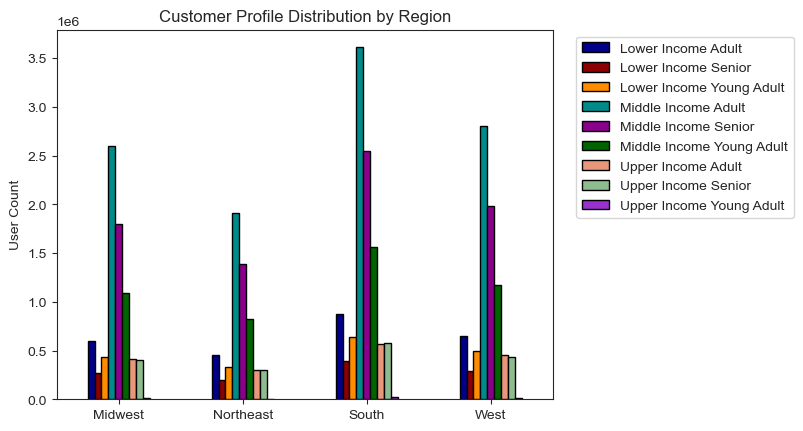

In [48]:
cust_pro_in_region_bar = nf_cp_cop_merged.groupby(['region','cust_profile']).size().unstack()

cust_pro_in_region_bar.plot(kind='bar', color=['darkblue','darkred','darkorange',
                                               'darkcyan','darkmagenta','darkgreen',
                                              'darksalmon', 'darkseagreen', 'darkorchid'], edgecolor = 'black')

plt.legend(title=None)
plt.xlabel('')
plt.ylabel('User Count')
plt.title('Customer Profile Distribution by Region')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.50,1), loc='upper right')
plt.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', 'Customer Profiles in Regions.png'),bbox_inches='tight')
plt.show()

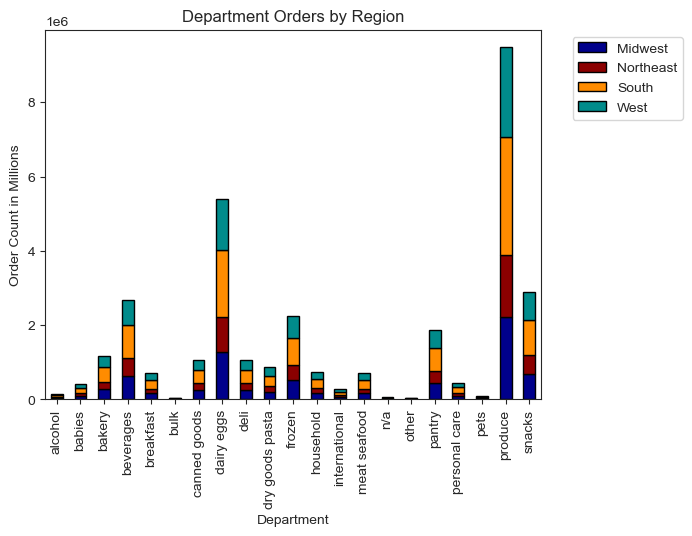

In [49]:
department_orders_region_bar = nf_cp_cop_merged.groupby(['department_name','region']).size().unstack()

department_orders_region_bar.plot(kind='bar', stacked = True, color=['darkblue','darkred','darkorange',
                                               'darkcyan'], edgecolor = 'black')

plt.legend(title=None)
plt.xlabel('Department')
plt.ylabel('Order Count in Millions')
plt.title('Department Orders by Region')
plt.legend(bbox_to_anchor=(1.30,1), loc='upper right')
plt.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', 'Department Orders by Region.png'),bbox_inches='tight')
plt.show()

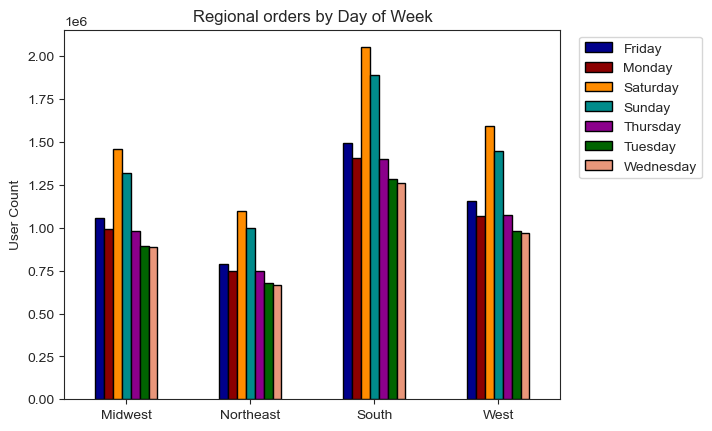

In [50]:
cust_pro_order_dow_bar = nf_cp_cop_merged.groupby(['region','day_of_week']).size().unstack()

cust_pro_order_dow_bar.plot(kind='bar', color=['darkblue','darkred','darkorange',
                                               'darkcyan','darkmagenta','darkgreen',
                                              'darksalmon'], edgecolor = 'black')

plt.legend(title=None)
plt.xlabel('')
plt.ylabel('User Count')
plt.title('Regional orders by Day of Week')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.30,1), loc='upper right')
plt.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', 'Regional Orders by Day of Week.png'),bbox_inches='tight')
plt.show()

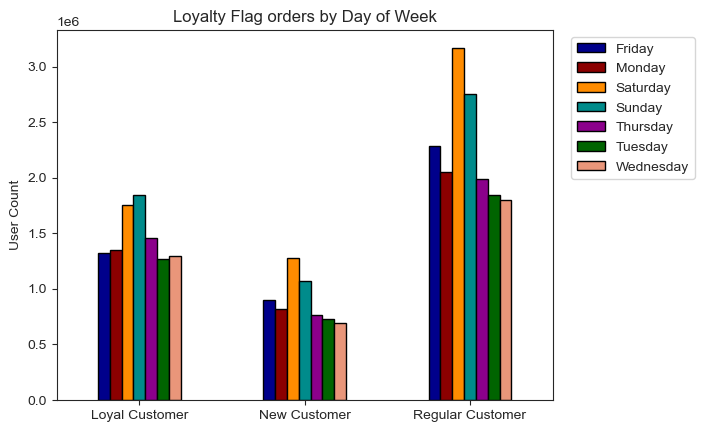

In [51]:
lf_order_dow_bar = nf_cp_cop_merged.groupby(['loyalty_flag','day_of_week']).size().unstack()

lf_order_dow_bar.plot(kind='bar', color=['darkblue','darkred','darkorange',
                                               'darkcyan','darkmagenta','darkgreen',
                                              'darksalmon'], edgecolor = 'black')

plt.legend(title=None)
plt.xlabel('')
plt.ylabel('User Count')
plt.title('Loyalty Flag orders by Day of Week')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.30,1), loc='upper right')
plt.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', 'Loyalty Flag Orders by Day of Week.png'),bbox_inches='tight')
plt.show()

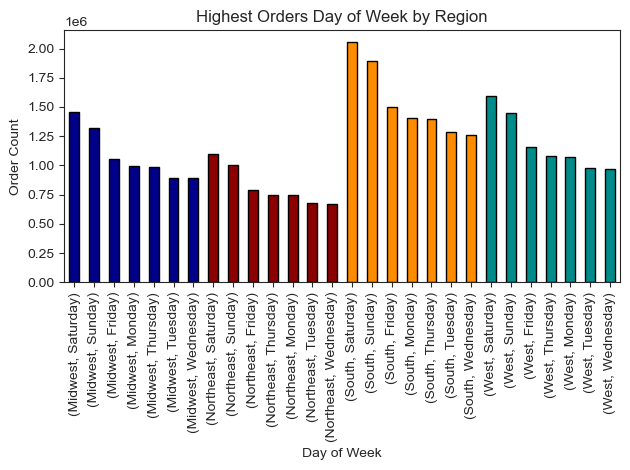

In [52]:
# Region Highest Ordering day
region_order_day_bar = nf_cp_cop_merged.groupby('region')['day_of_week'].value_counts().plot.bar(title = 'Highest Orders Day of Week by Region', xlabel = 'Day of Week', ylabel = 'Order Count', edgecolor = 'black', color=['darkblue'] * 7 + ['darkred'] * 7+['darkorange'] * 7 + ['darkcyan'] * 7)
plt.tight_layout()
region_order_day_bar.figure.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', 'Region Highest Days of Week Order unstack.png'))

In [53]:
# Creating a seed 
np.random.seed(4)
# Storing T/F values
dev = np.random.rand(len(nf_cp_cop_merged)) <= 0.7

In [54]:
big = nf_cp_cop_merged[dev]
small = nf_cp_cop_merged[~dev]

In [55]:
len(nf_cp_cop_merged)

32404859

In [56]:
len(big)+len(small)

32404859

In [57]:
hod_regional_ordering = small[['order_hour_of_day','prices','order_id','region']]

G:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
G:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


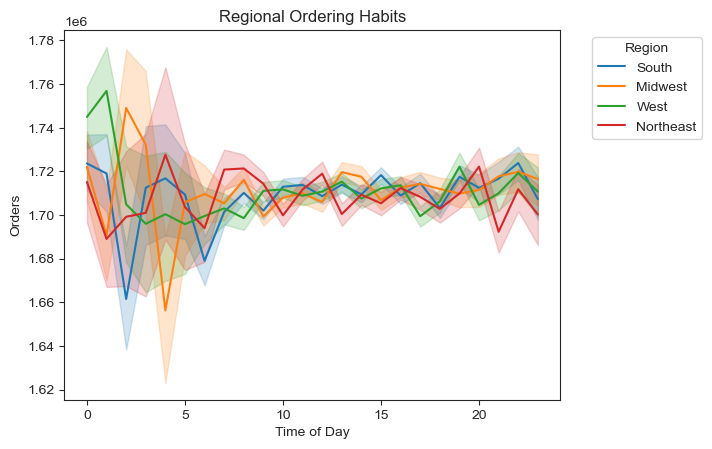

In [58]:
# Create Line Chart
hod_regional_ordering_line = sns.lineplot(data=hod_regional_ordering, x='order_hour_of_day', y='order_id', hue='region')
plt.title('Regional Ordering Habits')
plt.xlabel('Time of Day')
plt.ylabel('Orders')
# Display the legend
plt.legend(bbox_to_anchor=(1.30,1), loc='upper right',title='Region')
# Show the plot
plt.show()
hod_regional_ordering_line.figure.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', 'Hour of Day Regional Ordering.png'),bbox_inches='tight')

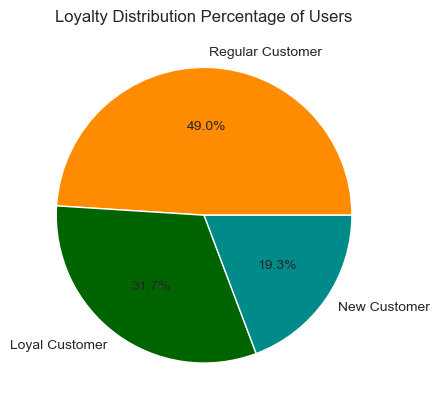

In [59]:
loyalty_dis = (nf_cp_cop_merged['loyalty_flag'].value_counts(normalize=True)*100)
loyalty_dis_pie = plt.pie(loyalty_dis, labels=loyalty_dis.index, autopct ='%1.1f%%',colors=['darkorange','darkgreen','darkcyan'])
plt.title('Loyalty Distribution Percentage of Users')
save_path = os.path.join(path, '04 - Analysis', 'Visualizations', 'Loyalty Percentage Distribution.png.png')
plt.savefig(save_path)
plt.show()

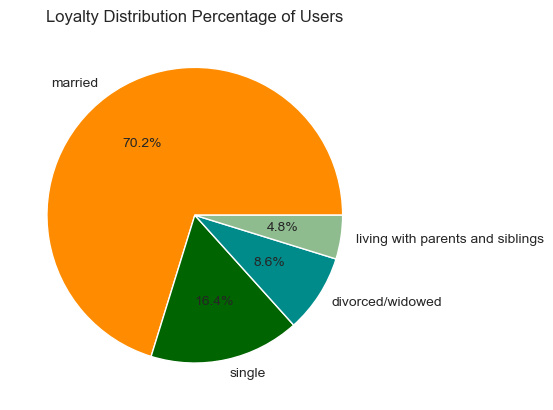

In [60]:
fam_status_dis = (nf_cp_cop_merged['fam_status'].value_counts(normalize=True)*100)
fam_status_dis_pie = plt.pie(fam_status_dis, labels=fam_status_dis.index, autopct ='%1.1f%%',colors=['darkorange','darkgreen','darkcyan','darkseagreen'])
plt.title('Marital Status Distribution of Users')
plt.title('Loyalty Distribution Percentage of Users')
save_path = os.path.join(path, '04 - Analysis', 'Visualizations', 'Marital Status Distribution.png.png')
plt.savefig(save_path)
plt.show()

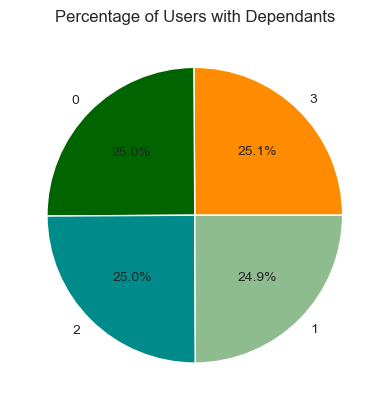

In [61]:
n_dependants_dis = (nf_cp_cop_merged['n_dependants'].value_counts(normalize=True)*100)
n_dependants_dis_pie = plt.pie(n_dependants_dis, labels=n_dependants_dis.index, autopct ='%1.1f%%',colors=['darkorange','darkgreen','darkcyan','darkseagreen'])
plt.title('Percentage of Users with Dependants')
save_path = os.path.join(path, '04 - Analysis', 'Visualizations', 'Dependants Distribution.png.png')
plt.savefig(save_path)
plt.show()

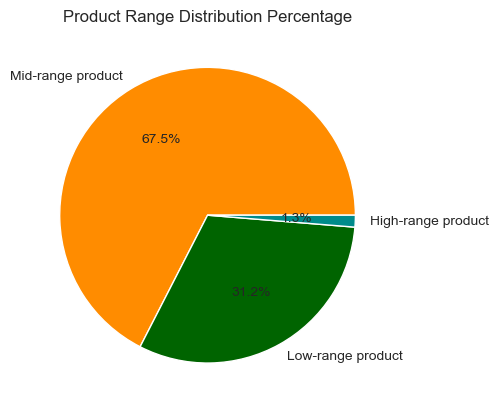

In [62]:
prod_range_dis = (nf_cp_cop_merged['price_range_loc'].value_counts(normalize=True)*100)
product_range_dis_pie = plt.pie(prod_range_dis, labels=prod_range_dis.index, autopct ='%1.1f%%',colors=['darkorange','darkgreen','darkcyan'])
plt.title('Product Range Distribution Percentage')
save_path = os.path.join(path, '04 - Analysis', 'Visualizations', 'Product Range Distribution.png.png')
plt.savefig(save_path)
plt.show()

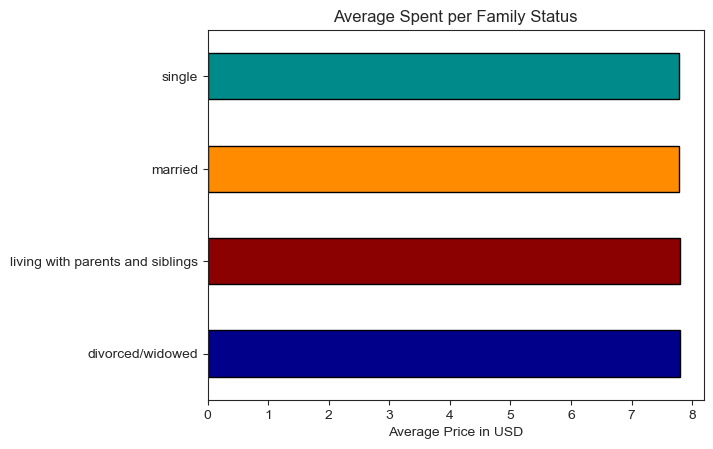

In [63]:
fam_prices = nf_cp_cop_merged.groupby('fam_status')['prices'].mean()

fam_prices = fam_prices.plot(kind='barh', stacked = False, edgecolor = 'black', color=['darkblue','darkred','darkorange','darkcyan'])
plt.title('Average Spent per Family Status')
plt.xlabel('Average Price in USD')
plt.ylabel('')
plt.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', 'Average Spent per Family Status.png'))
plt.show()

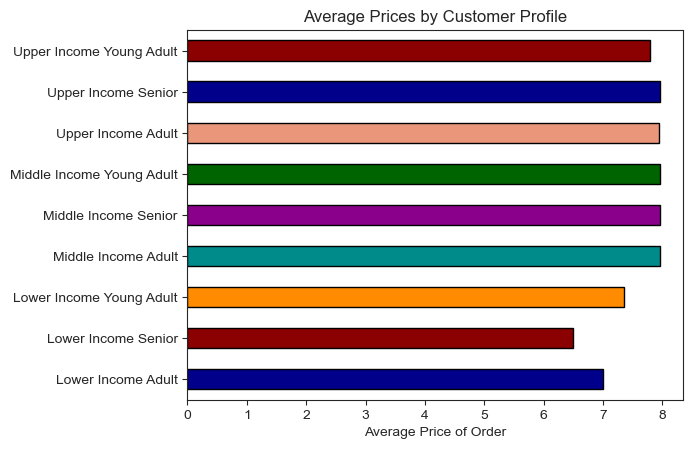

In [64]:
avg_prices_cust_pro = nf_cp_cop_merged.groupby('cust_profile')['prices'].mean()

cust_pro_prices = avg_prices_cust_pro.plot(kind='barh', stacked = False, edgecolor = 'black', color=['darkblue','darkred','darkorange','darkcyan','darkmagenta','darkgreen','darksalmon'])
plt.title('Average Prices by Customer Profile')
plt.xlabel('Average Price of Order')
plt.ylabel('')
plt.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', 'Average Spent per Customer Profile.png'))
plt.show()

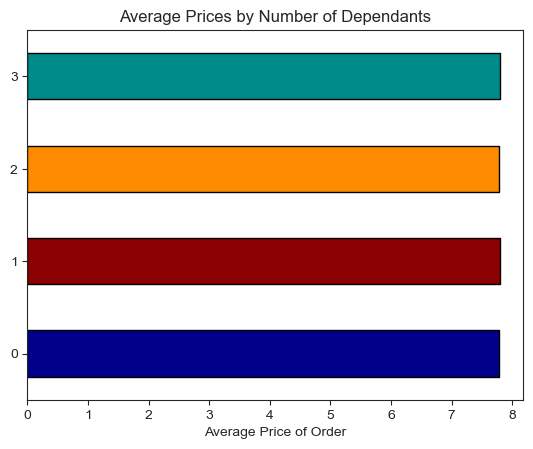

In [65]:
avg_prices_ndependants = nf_cp_cop_merged.groupby('n_dependants')['prices'].mean()

ndepdnants_prices = avg_prices_ndependants.plot(kind='barh', stacked = False, edgecolor = 'black', color=['darkblue','darkred','darkorange','darkcyan','darkmagenta','darkgreen','darksalmon'])
plt.title('Average Prices by Number of Dependants')
plt.xlabel('Average Price of Order')
plt.ylabel('')
plt.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', 'Average Spent per Number of Dependants.png'))
plt.show()

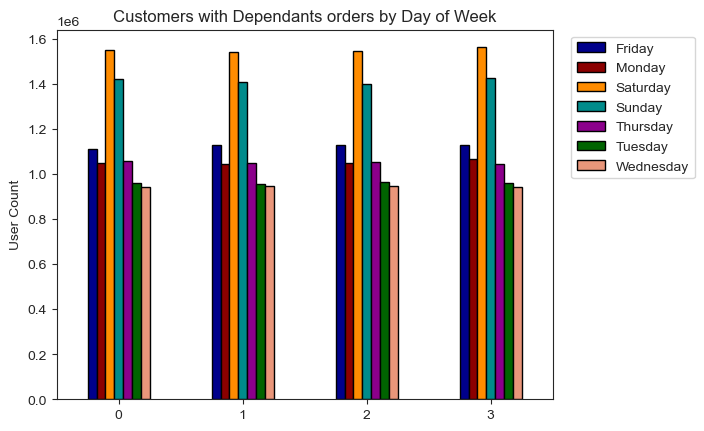

In [66]:
ndep_dow_bar = nf_cp_cop_merged.groupby(['n_dependants','day_of_week']).size().unstack()

ndep_dow_bar.plot(kind='bar', color=['darkblue','darkred','darkorange',
                                               'darkcyan','darkmagenta','darkgreen',
                                              'darksalmon'], edgecolor = 'black')

plt.legend(title=None)
plt.xlabel('')
plt.ylabel('User Count')
plt.title('Customers with Dependants orders by Day of Week')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.30,1), loc='upper right')
plt.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', 'Customers with Dependants DoW.png'),bbox_inches='tight')
plt.show()

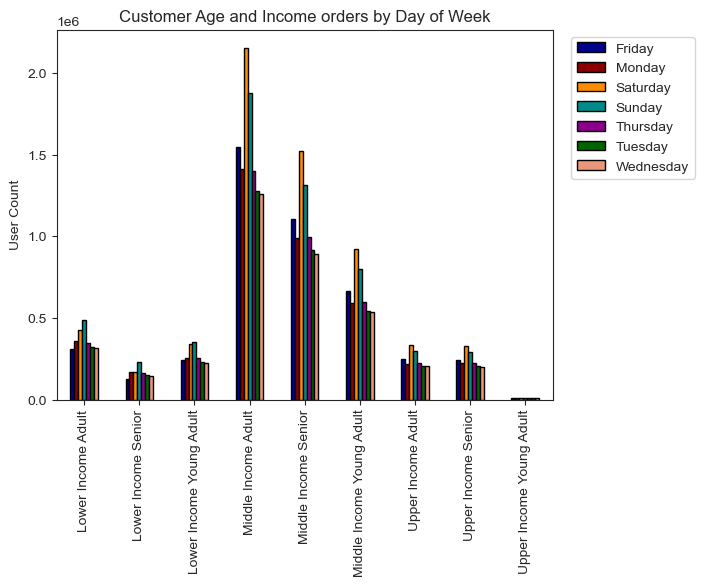

In [67]:
custpro_dow_bar = nf_cp_cop_merged.groupby(['cust_profile','day_of_week']).size().unstack()

custpro_dow_bar.plot(kind='bar', color=['darkblue','darkred','darkorange',
                                               'darkcyan','darkmagenta','darkgreen',
                                              'darksalmon'], edgecolor = 'black')

plt.legend(title=None)
plt.xlabel('')
plt.ylabel('User Count')
plt.title('Customer Age and Income orders by Day of Week')
plt.xticks()
plt.legend(bbox_to_anchor=(1.30,1), loc='upper right')
plt.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', 'Customers Profile DoW.png'),bbox_inches='tight')
plt.show()

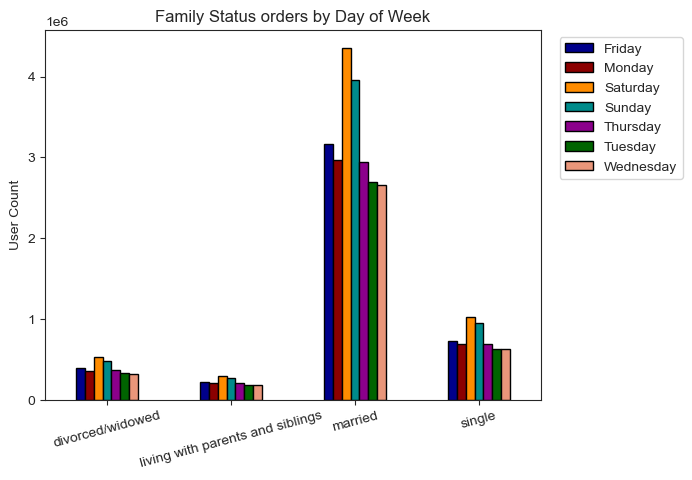

In [68]:
famstats_dow_bar = nf_cp_cop_merged.groupby(['fam_status','day_of_week']).size().unstack()

famstats_dow_bar.plot(kind='bar', color=['darkblue','darkred','darkorange',
                                               'darkcyan','darkmagenta','darkgreen',
                                              'darksalmon'], edgecolor = 'black')

plt.legend(title=None)
plt.xlabel('')
plt.ylabel('User Count')
plt.title('Family Status orders by Day of Week')
plt.xticks(rotation=15)
plt.legend(bbox_to_anchor=(1.30,1), loc='upper right')
plt.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', 'Family Status DoW.png'),bbox_inches='tight')
plt.show()

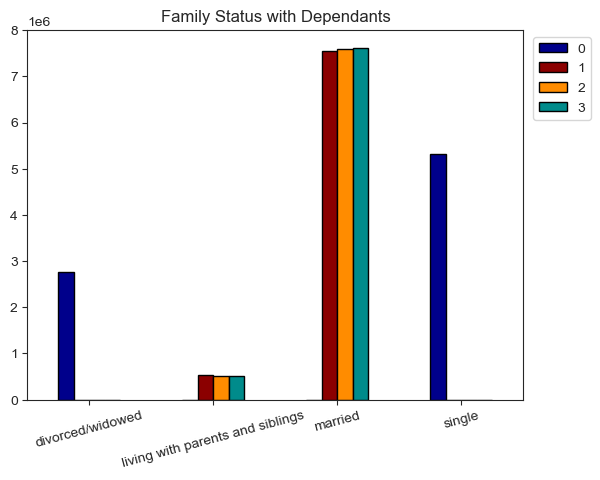

In [69]:
famstats_ndepend_bar = nf_cp_cop_merged.groupby(['fam_status','n_dependants']).size().unstack()

famstats_ndepend_bar.plot(kind='bar', color=['darkblue','darkred','darkorange',
                                               'darkcyan','darkmagenta','darkgreen',
                                              'darksalmon'], edgecolor = 'black')

plt.legend(title=None)
plt.xlabel('')
plt.ylabel('')
plt.title('Family Status with Dependants')
plt.xticks(rotation=15)
plt.legend(bbox_to_anchor=(1.15,1), loc='upper right')
plt.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', 'Family Status With Dependants.png'),bbox_inches='tight')
plt.show()

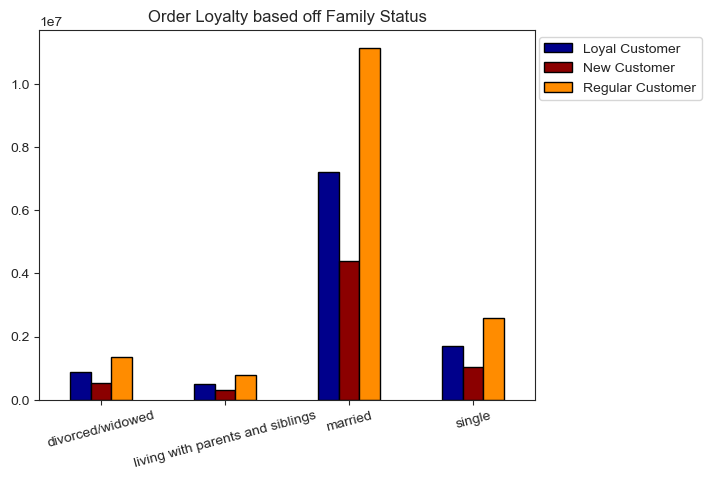

In [70]:
famstats_loyalty_bar = nf_cp_cop_merged.groupby(['fam_status','loyalty_flag']).size().unstack()

famstats_loyalty_bar.plot(kind='bar', color=['darkblue','darkred','darkorange',
                                               'darkcyan','darkmagenta','darkgreen',
                                              'darksalmon'], edgecolor = 'black')

plt.legend(title=None)
plt.xlabel('')
plt.ylabel('')
plt.title('Order Loyalty based off Family Status')
plt.xticks(rotation=15)
plt.legend(bbox_to_anchor=(1.35,1), loc='upper right')
plt.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', 'Order Loyalty based off Family Status.png'),bbox_inches='tight')
plt.show()

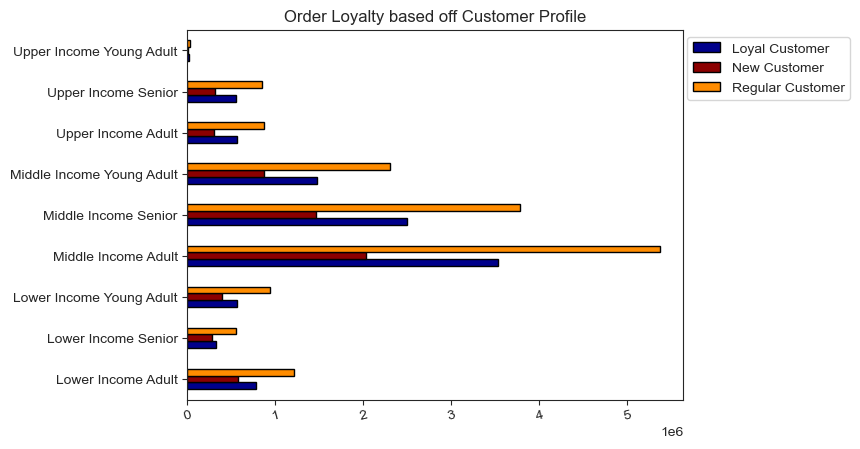

In [71]:
custpro_loyalty_bar = nf_cp_cop_merged.groupby(['cust_profile','loyalty_flag']).size().unstack()

custpro_loyalty_bar.plot(kind='barh', color=['darkblue','darkred','darkorange',
                                               'darkcyan','darkmagenta','darkgreen',
                                              'darksalmon'], edgecolor = 'black')

plt.legend(title=None)
plt.xlabel('')
plt.ylabel('')
plt.title('Order Loyalty based off Customer Profile')
plt.xticks(rotation=15)
plt.legend(bbox_to_anchor=(1.35,1), loc='upper right')
plt.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', 'Order Loyalty based off Customer Profile.png'),bbox_inches='tight')
plt.show()

# 4.10.9 - Produce suitable charts to illustrate your results and export them in your project folder.

In [72]:
nf_cp_cop_merged.to_pickle(os.path.join(path, '02 - Data', 'Prepared Data', 'Final_nf_cp_cop_merged'))